一般に
$$\begin{equation}
G(i\omega_n)=\int_{-\infty}^{\infty}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n-\epsilon'}
\tag{5}
\end{equation}$$
が成立。  
ただし$\rho(\epsilon')$は  
$$\int_{-\infty}^{\infty}d\epsilon'\rho(\epsilon')=1$$
を満たす。  
(1)式は
$$\rho(\epsilon')=\delta(\epsilon'-\epsilon)$$
の場合。  
今度は、
$$\rho(\epsilon')=\frac{1}{2\pi}\sqrt{4-\epsilon'^2}$$
とした場合を考える。  
これは半径２の半円であり $\epsilon'<-2$ および $\epsilon'>2$ では $\rho(\epsilon')=0$とする。  
このとき(5)式は（積分範囲に注目）
$$\begin{eqnarray}
G(i\omega_n) &=& \int_{-2}^{2}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n-\epsilon'} \\
&=& \int_{-1}^{1}2dx \frac{\rho(2x)}{i\omega_n-2x} \\
&=& \frac{2}{\pi}\int_{-1}^{1}dx \frac{\sqrt{1-x^2}}{i\omega_n-2x}
\tag{6}
\end{eqnarray}$$
これを積分を数値的に実行する。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import my_int    # my_int（「数値積分.ipynb」をpythonファイルに変換したもの）をモジュールとして使う。

y_aの積分誤差 0.020000000000000094
y_bの積分誤差 0.0001333333333335407
y_cの積分誤差 0.020000000000000018
y_aの積分誤差 9.367506770274758e-17
y_bの積分誤差 0.0001333333333335407
y_cの積分誤差 1.734723475976807e-17
y_1の積分誤差： -3.469446951953614e-18
y_2の積分誤差： 0.0001360405400810949
y_3の積分誤差： 1.0408340855860843e-17
y_aの積分誤差： 3.642919299551295e-17
y_bの積分誤差： 1.3741468695149806e-06
y_cの積分誤差： -1.9081958235744878e-17
y_aの積分誤差： 6.838893860458918e-17
y_bの積分誤差： 1.1102230246251565e-16
y_cの積分誤差： -5.843001479524177e-18
y_1の積分誤差： -1.371515748194163e-16
y_2の積分誤差： -6.328271240363392e-15
y_3の積分誤差： -1.973247953923618e-17


/mnt/c/Users/神里友一/iCloudDrive/Python_file/my_int.py:245: RuntimeWarning: overflow encountered in cosh
  for i in range(-N,N+1) :
/mnt/c/Users/神里友一/iCloudDrive/Python_file/my_int.py:245: RuntimeWarning: overflow encountered in double_scalars
  for i in range(-N,N+1) :


↑は気にしなくていいです。


まずは、(6)をガウスルジャンドルで数値積分する。

In [2]:
help(my_int.int_gauss)

Help on function int_gauss in module my_int:

int_gauss(func, a, b, n)
    int_gauss(func,a,b,n)
    渡された関数funcをガウス・ルジャンドル積分した結果を返す。
    a,bはそれぞれ積分の下端と上端。nは分割数。



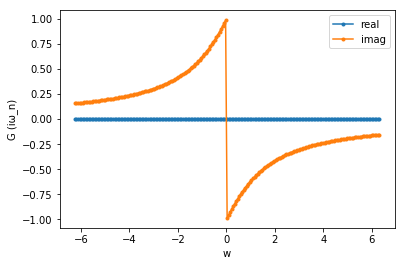

In [3]:
beta = 100                     # βの大きさを設定
n_w = np.arange(-100,101)      # グラフに表示するnの範囲を設定
w = np.pi*(2*n_w+1)/beta
G_iw_gauss = np.empty((len(n_w),),dtype=np.complex)
for n in range(len(n_w)) :
    func = lambda x : 2/np.pi*np.sqrt(1-x**2)/(w[n]*1j-2*x)
    G_iw_gauss[n] = my_int.int_gauss(func,-1,1,400)

plt.plot(w, G_iw_gauss.real, label='real', marker='.')
plt.plot(w, G_iw_gauss.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

次に、同じことをガウス・ルジャンドルでなく2重指数関数型積分（DE）で行う。

In [4]:
help(my_int.int_DE)

Help on function int_DE in module my_int:

int_DE(func, a, b, n, N)
    int_DE(func,a,b,n,N)
    渡された関数funcを2重指数関数型積分した結果を返す。
    a,bはそれぞれ積分の下端と上端。nは分割数。和の範囲は第N項で打ち切る。



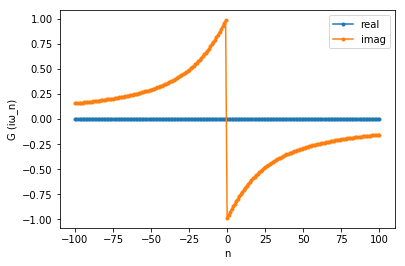

In [5]:
G_iw_DE = np.empty((len(n_w),),dtype=np.complex)
for n in range(len(n_w)) :
    func = lambda x : 2/np.pi*np.sqrt(1-x**2)/(w[n]*1j-2*x)
    G_iw_DE[n] = my_int.int_DE(func,-1,1,400,1000)

plt.plot(n_w, G_iw_DE.real, label='real', marker='.')
plt.plot(n_w, G_iw_DE.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

$\rho(\epsilon)$が偶関数 $\rho(\epsilon)=\rho(-\epsilon)$のとき(5)式の複素共役をとると
$$\begin{eqnarray}
G(i\omega_n)^{*} &=& \int_{-\infty}^{\infty}d\epsilon \frac{\rho(\epsilon)}{-i\omega_n-\epsilon} \\
&=& -\int_{-\infty}^{\infty}d\epsilon \frac{\rho(\epsilon)}{i\omega_n+\epsilon} \\
&=& \int_{\infty}^{-\infty}d\epsilon' \frac{\rho(-\epsilon')}{i\omega_n-\epsilon'}　　(\epsilon'\equiv\epsilon)\\
&=& -\int_{-\infty}^{\infty}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n-\epsilon'} \\
&=& -G(i\omega_n)
\end{eqnarray}$$
ゆえに、$G(i\omega_n)$は純虚数である。今回、$\rho(\epsilon)$は偶関数であり、上の数値積分の結果では確かに$G(i\omega_n)$の実部はゼロになっている。
 
 
また、(6)式より、$|\omega|\to\infty$では

$$
G(i\omega_n) \to \int_{-2}^{2}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n}
= \frac{1}{i\omega}
\to 0
$$

と、$1/i\omega$の速さで減衰するはずである。ただし$\int_{-2}^{2}d\epsilon'\rho(\epsilon')=1$が成り立つことを用いた。  
DEの結果とガウスルジャンドルの結果がそのようになっているか確認する。   
べき関数$y(x)$について
$$\begin{eqnarray}
y &=& Ax^{n} \\
\Leftrightarrow \log{y} &=& n\log{x}+\log{A}
\end{eqnarray}$$  
であるから、両対数グラフではこれは直線となる。今の場合だと$A=1,n=-1$のものに相当するので原点を通る傾き-1の直線に漸近するはずである。  
今まで表示したグラフについて、両軸を対数スケールに変えるだけでいい。

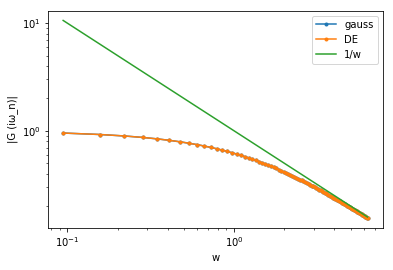

In [6]:
y = 1/w     # 漸近線

# 対数の引数は正なので、横軸はω_n > 0 ,縦軸は|G(iω_n)|をとる必要がある。
# ω_n > 0という条件は、配列をスライスしてオフセット100以降を取り出すことによって実現する。

plt.plot(w[101:], np.abs(G_iw_gauss.imag[101:]), label='gauss', marker='.')  
plt.plot(w[101:], np.abs(G_iw_DE.imag[101:]), label='DE', marker='.')
plt.plot(w[101:], y[101:], label='1/w')
plt.xscale('log')     # ここでlogスケールに設定。
plt.yscale('log')
plt.xlabel('w')
plt.ylabel('|G (iω_n)|')
plt.legend()
plt.show()

ちゃんと漸近している。

(6)式は解析的に積分を実行することもでき、その結果は
$$\begin{eqnarray}
G(i\omega_n) &=& \frac{2}{\pi}\int_{-1}^{1}dx \frac{\sqrt{1-x^2}}{i\omega_n-2x} \\
&=& i\left(\frac{\omega}{2}-sgn(\frac{\omega}{2})\sqrt{(\frac{\omega}{2})^2+1}\right)
\tag{6}
\end{eqnarray}$$
となるらしい。ただしsgnは符号関数。  
（$x$を三角関数に変数変換し、さらにそれをオイラー公式から$\exp{2iθ}$に置き換えて留数定理を使えばできるかも？）    
このグラフを描くと

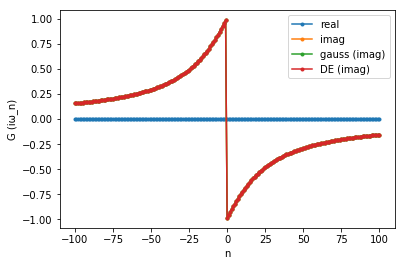

In [7]:
G_iw_ex = 1j*(w/2-np.sign(w)*np.sqrt( (w/2)**2+1) )   # exはExactという意味
plt.plot(n_w, G_iw_ex.real, label='real', marker='.')
plt.plot(n_w, G_iw_ex.imag, label='imag', marker='.')
plt.plot(n_w, G_iw_gauss.imag, label='gauss (imag)' , marker='.')
plt.plot(n_w, G_iw_DE.imag, label='DE (imag)' , marker='.')
plt.xlabel('n')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

数値積分のものと完全に一致して見える。

試しに厳密値との誤差を調べると

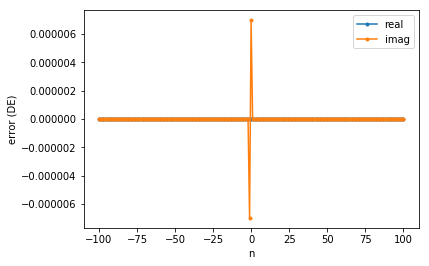

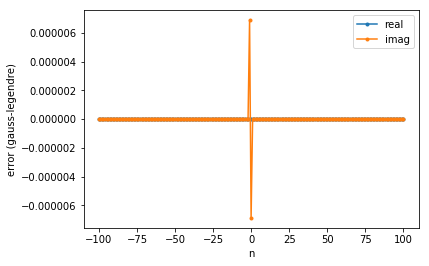

In [8]:
# DEの厳密値との差 error_DE を表示
error_DE = G_iw_ex-G_iw_DE
plt.plot(n_w, error_DE.real, label='real', marker='.')
plt.plot(n_w, error_DE.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('error (DE)')
plt.legend()
plt.show()

# ガウス・ルジャンドルの厳密値との差 error_gauss を表示
error_gauss = G_iw_ex-G_iw_gauss
plt.plot(n_w, error_gauss.real, label='real', marker='.')
plt.plot(n_w, error_gauss.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('error (gauss-legendre)')
plt.legend()
plt.show()

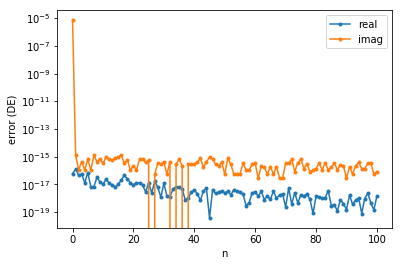

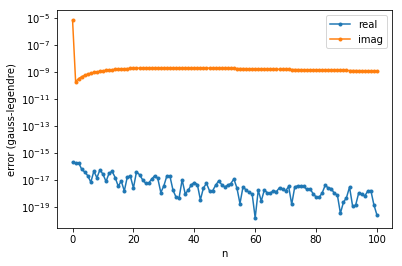

In [9]:
# DEの厳密値との差 error_DE を表示
error_DE = G_iw_ex-G_iw_DE
plt.plot(n_w[100:], np.abs(error_DE.real[100:]), label='real', marker='.')
plt.plot(n_w[100:], np.abs(error_DE.imag[100:]), label='imag', marker='.')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('error (DE)')
plt.legend()
plt.show()

# ガウス・ルジャンドルの厳密値との差 error_gauss を表示
error_gauss = G_iw_ex-G_iw_gauss
plt.plot(n_w[100:], np.abs(error_gauss.real[100:]), label='real', marker='.')
plt.plot(n_w[100:], np.abs(error_gauss.imag[100:]), label='imag', marker='.')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('error (gauss-legendre)')
plt.legend()
plt.show()